In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 83.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import LabelEncoder

!pip install unidecode
!pip install openpyxl

import pandas as pd
from pandas import read_excel
import numpy as np
import re
from re import sub
import multiprocessing
from unidecode import unidecode
import os
from time import time

import h5py
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 8.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
dataset = pd.read_excel('/content/drive/MyDrive/thesis/bangla_sentence_Dataset(modified for mixing).xlsx')

dataset.head()

,text,classes
0,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...,disgust
1,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...,disgust
2,ভেজাল নির্বাচন ।,anger
3,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...,joy
4,"সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল, এ...",anger


In [ ]:
len(dataset.text.value_counts())

19204

In [ ]:
dataset.shape

(19204, 2)

In [ ]:
dataset.dropna()

,text,classes
0,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...,disgust
1,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...,disgust
2,ভেজাল নির্বাচন ।,anger
3,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...,joy
4,"সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল, এ...",anger
...,...,...
19199,৬ মাস এমন করে চেক দিলে চুরি কমে যাবে ইনশাআল্লাহ!!,joy
19200,শুরুটা অল্প বলে কি সাজা মাত্র ১ বছর....,disgust
19201,"ভাই, আপনার ""চলে গেলেন"" দেইক্ষাইতো ইন্নালিল্লাহ...",joy
19202,বুলাপু ️\nএত সাহস নিয়ে কিভাবে এত গুছায় কথা বলল...,surprise


In [ ]:
dataset.shape

(19204, 2)

In [ ]:
#filter rows where col1 has a string length of 5
dataset = dataset.loc[dataset['text'].str.len() < 100]

In [ ]:
dataset.shape

(11649, 2)

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
dataset['encoded_classes'] = encoder.fit_transform(dataset['classes'])
dataset.head()

,text,classes,encoded_classes
0,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...,disgust,1
2,ভেজাল নির্বাচন ।,anger,0
3,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...,joy,3
4,"সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল, এ...",anger,0
6,কিন্তু কিছু কিছু লোক এই নির্বাচনের মাধ্যমে আওয়...,joy,3


In [ ]:
train_texts = dataset['text'].astype(str).values.tolist()

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(dataset['text'], dataset['encoded_classes'], test_size = 0.3,random_state=42)

In [ ]:
xtrain = xtrain.astype(str).values.tolist()
xtest = xtest.astype(str).values.tolist()

In [ ]:
from transformers import AutoTokenizer, AutoModel
tokenizer = AutoTokenizer.from_pretrained("bert-base-multilingual-cased")

In [ ]:
# Tokenize train reviews
encoded_rvw = [tokenizer.encode(sent, add_special_tokens=True) for sent in xtrain]

# Find the longest tokenized review
max_len = max([len(sent) for sent in encoded_rvw])
print('Max length: ', max_len)

Max length:  63


In [ ]:
encoded_data_train = tokenizer.batch_encode_plus(
    xtrain,
    add_special_tokens=True,
    return_attention_mask=True,
    pad_to_max_length=True,
    truncation=True,
    max_length=512,
    return_tensors='pt'
)

encoded_data_test = tokenizer.batch_encode_plus(
    xtest,
    add_special_tokens=True,
    return_attention_mask=True,
    pad_to_max_length=True,
    truncation=True,
    max_length=512,
    return_tensors='pt'
)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2364: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2364: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input 

In [ ]:
!pip install torch
import torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from torch.utils.data import TensorDataset

In [ ]:
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(ytrain.values)


input_ids_test = encoded_data_test['input_ids']
attention_masks_test = encoded_data_test['attention_mask']
labels_test = torch.tensor(ytest.values)


# Pytorch TensorDataset Instance
dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_test = TensorDataset(input_ids_test, attention_masks_test, labels_test)

In [ ]:

from transformers import DataCollatorWithPadding,AutoModelForSequenceClassification, Trainer, TrainingArguments,AutoTokenizer,AutoModel,AutoConfig
from transformers.modeling_outputs import TokenClassifierOutput
import torch
import torch.nn as nn
import pandas as pd

In [ ]:
class CustomModel(nn.Module):
  def __init__(self,checkpoint,num_labels):
    super(CustomModel,self).__init__()
    self.num_labels = num_labels

    #Load Model with given checkpoint and extract its body
    self.model = model = AutoModel.from_pretrained(checkpoint,config=AutoConfig.from_pretrained(checkpoint, output_attentions=True,output_hidden_states=True))
    self.dropout = nn.Dropout(0.1)
    self.classifier = nn.Linear(768,num_labels) # load and initialize weights

  def forward(self, input_ids=None, attention_mask=None,labels=None):
    #Extract outputs from the body
    outputs = self.model(input_ids=input_ids, attention_mask=attention_mask)

    #Add custom layers
    sequence_output = self.dropout(outputs[0]) #outputs[0]=last hidden state

    logits = self.classifier(sequence_output[:,0,:].view(-1,768)) # calculate losses

    loss = None
    if labels is not None:
      loss_fct = nn.CrossEntropyLoss()
      loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))

    return TokenClassifierOutput(loss=loss, logits=logits, hidden_states=outputs.hidden_states,attentions=outputs.attentions)

In [ ]:
checkpoint="bert-base-multilingual-cased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model=CustomModel(checkpoint=checkpoint,num_labels=6).to(device)

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
for name, param in model.named_parameters():
    print(name, param.requires_grad)

model.embeddings.word_embeddings.weight True
model.embeddings.position_embeddings.weight True
model.embeddings.token_type_embeddings.weight True
model.embeddings.LayerNorm.weight True
model.embeddings.LayerNorm.bias True
model.encoder.layer.0.attention.self.query.weight True
model.encoder.layer.0.attention.self.query.bias True
model.encoder.layer.0.attention.self.key.weight True
model.encoder.layer.0.attention.self.key.bias True
model.encoder.layer.0.attention.self.value.weight True
model.encoder.layer.0.attention.self.value.bias True
model.encoder.layer.0.attention.output.dense.weight True
model.encoder.layer.0.attention.output.dense.bias True
model.encoder.layer.0.attention.output.LayerNorm.weight True
model.encoder.layer.0.attention.output.LayerNorm.bias True
model.encoder.layer.0.intermediate.dense.weight True
model.encoder.layer.0.intermediate.dense.bias True
model.encoder.layer.0.output.dense.weight True
model.encoder.layer.0.output.dense.bias True
model.encoder.layer.0.output.La

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
batch_size=8;
dataloader_train = DataLoader(dataset_train,
                              sampler=RandomSampler(dataset_train),
                              batch_size=batch_size)


dataloader_test = DataLoader(dataset_test,
                                   sampler=SequentialSampler(dataset_test),
                                   batch_size=batch_size)

In [ ]:
from transformers import AdamW,get_scheduler

optimizer = AdamW(model.parameters(), lr=2e-5)

num_epochs = 15
num_training_steps = num_epochs * len(dataloader_train)
lr_scheduler = get_scheduler(
    "linear",
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=num_training_steps,
)
print(num_training_steps)


15300


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
from tqdm.auto import tqdm





for epoch in range(num_epochs):
  model.train()
  loss_train_total = 0
  progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
  for batch in progress_bar:
      batch = tuple(b.to(device) for b in batch)
      inputs = {'input_ids':      batch[0].to(device),
                'attention_mask': batch[1].to(device),
                'labels':         batch[2].to(device),
                }

      outputs = model(**inputs)
      loss = outputs[0]
      loss_train_total += loss.item()
      loss.backward()

      optimizer.step()
      lr_scheduler.step()
      optimizer.zero_grad()
      progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
  tqdm.write(f'\nEpoch {epoch}')
  loss_train_avg = loss_train_total/len(dataloader_train)
  tqdm.write(f'Training loss: {loss_train_avg}')

Epoch 0:   0%|          | 0/1020 [00:00<?, ?it/s]


Epoch 0
Training loss: 1.602882902937777


Epoch 1:   0%|          | 0/1020 [00:00<?, ?it/s]


Epoch 1
Training loss: 1.4004807447101555


Epoch 2:   0%|          | 0/1020 [00:00<?, ?it/s]


Epoch 2
Training loss: 1.1964854798480575


Epoch 3:   0%|          | 0/1020 [00:00<?, ?it/s]


Epoch 3
Training loss: 0.9535216220526719


Epoch 4:   0%|          | 0/1020 [00:00<?, ?it/s]


Epoch 4
Training loss: 0.7119732349891873


Epoch 5:   0%|          | 0/1020 [00:00<?, ?it/s]


Epoch 5
Training loss: 0.5040108029292348


Epoch 6:   0%|          | 0/1020 [00:00<?, ?it/s]


Epoch 6
Training loss: 0.3501613771515515


Epoch 7:   0%|          | 0/1020 [00:00<?, ?it/s]


Epoch 7
Training loss: 0.22390505475558195


Epoch 8:   0%|          | 0/1020 [00:00<?, ?it/s]


Epoch 8
Training loss: 0.16454456855689048


Epoch 9:   0%|          | 0/1020 [00:00<?, ?it/s]


Epoch 9
Training loss: 0.11496053313809064


Epoch 10:   0%|          | 0/1020 [00:00<?, ?it/s]


Epoch 10
Training loss: 0.08816757997339272


Epoch 11:   0%|          | 0/1020 [00:00<?, ?it/s]


Epoch 11
Training loss: 0.058874644699515595


Epoch 12:   0%|          | 0/1020 [00:00<?, ?it/s]


Epoch 12
Training loss: 0.04723353533344754


Epoch 13:   0%|          | 0/1020 [00:00<?, ?it/s]


Epoch 13
Training loss: 0.031029722814884166


Epoch 14:   0%|          | 0/1020 [00:00<?, ?it/s]


Epoch 14
Training loss: 0.025680411507389235


In [ ]:
def evaluate(dataloader_test):

    model.eval()

    loss_val_total = 0
    predictions, true_vals = [], []

    for batch in dataloader_test:

        batch = tuple(b.to(device) for b in batch)

        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():
            outputs = model(**inputs)

        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)

    loss_val_avg = loss_val_total/len(dataloader_test)

    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)

    return loss_val_avg, predictions, true_vals

In [ ]:
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

In [ ]:
val_loss, predictions, true_vals = evaluate(dataloader_test)
val_f1 = f1_score_func(predictions, true_vals)

In [ ]:
print('Val Loss = ', val_loss)
print('Val F1 = ', val_f1)

Val Loss =  3.35207497350684
Val F1 =  0.4604865764087346


In [ ]:
encoded_classes = encoder.classes_
predicted_category = [encoded_classes[np.argmax(x)] for x in predictions]
true_category = [encoded_classes[x] for x in true_vals]

In [ ]:
x = 0
for i in range(len(true_category)):
    if true_category[i] == predicted_category[i]:
        x += 1

print('Accuracy Score = ', x / len(true_category))

Accuracy Score =  0.46065808297567956


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_true = true_category, y_pred = predicted_category, labels=list(encoded_classes))

<Axes: >

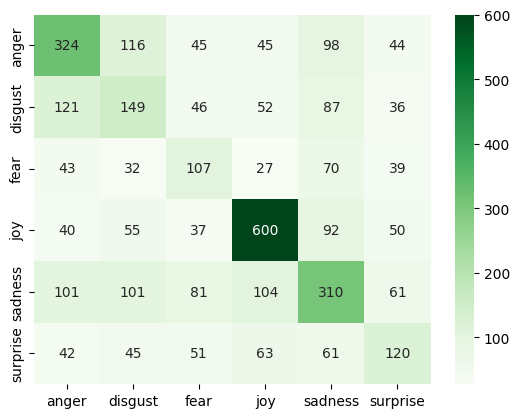

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.DataFrame(confusion_mat, index = list(encoded_classes),columns = list(encoded_classes))
sns.heatmap(df, annot=True,cmap="Greens", fmt='g')

Text(95.72222222222221, 0.5, 'Predicted Label')

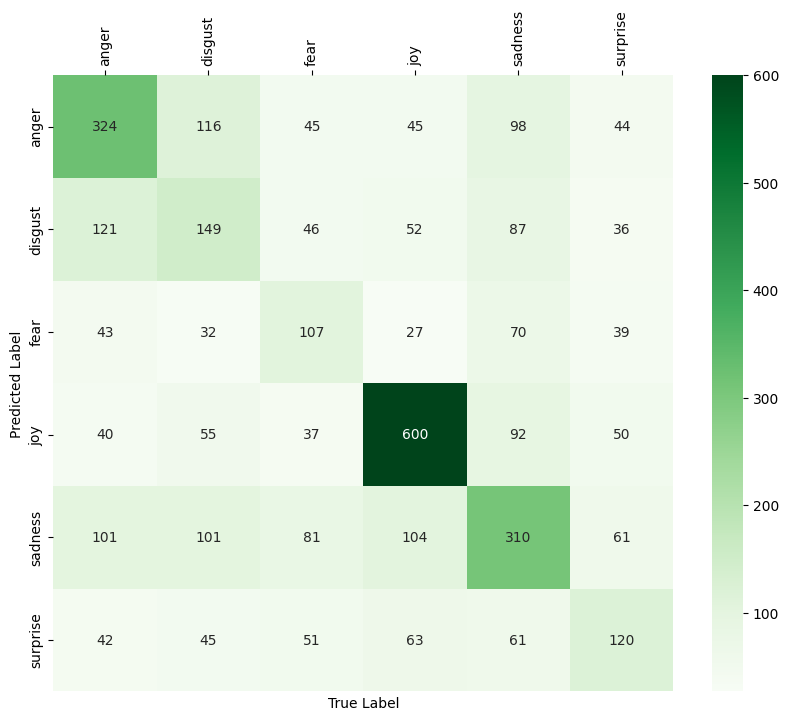

In [ ]:
import seaborn as sns
# return class label
# get confusion matrix
cm = confusion_matrix(y_true = true_category, y_pred = predicted_category, labels=list(encoded_classes))
# covert it to dataframe for plotting
cm_df = pd.DataFrame(cm,
                     index = list(encoded_classes),
                     columns = list(encoded_classes))
# plot it
plt.figure(figsize = (10,8))
g = sns.heatmap(cm_df,annot=True,cmap="Greens", fmt='g')
g.xaxis.set_ticks_position("top")
g.tick_params(axis='x', rotation=90)
g.set_xlabel("True Label")
g.set_ylabel("Predicted Label")

In [ ]:
from sklearn.metrics import classification_report
report = pd.DataFrame(classification_report(y_true = true_category, y_pred = predicted_category, output_dict=True)).transpose()
report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
report

,precision,recall,f1-score,support
anger,48.29,48.21,48.25,672.000000
disgust,29.92,30.35,30.13,491.000000
fear,29.16,33.65,31.24,318.000000
joy,67.34,68.65,67.99,874.000000
sadness,43.18,40.90,42.01,758.000000
surprise,34.29,31.41,32.79,382.000000
accuracy,46.07,46.07,46.07,0.460658
macro avg,42.03,42.19,42.07,3495.000000
weighted avg,46.09,46.07,46.05,3495.000000
